# Regresión con Árboles de Decisión

El conjunto de datos de este modelo proviene del repositorio “UCI Machine Learning”. 
Estos datos se recopilaron en 1978, y cada una de las 506 entradas representan datos agregados de 14 características de casas en diversos barrios de Boston.
Las características son:
- CRIM: Índice de criminalidad per capita
- ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).
- INDUS: Proporción de superficie de negocio no minorista.
- CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Índice de accesibilidad a las autopistas radiales
- TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.
- PTRATIO: Ratio de alumnos por profesor
- B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana
- LSTAT: Porcentaje de población de “estatus de bajo nivel”
- MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares)

El objetivo es predecir la mediana del valor de las viviendas (MEDV), basándose en las demás características

## Importar las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# cargar los datos
boston = datasets.load_boston()

In [3]:
# Transformar a dataframe para visualizar
col_names = list(boston.feature_names)
col_names.append('TARGET')
df = pd.DataFrame(np.c_[boston.data, boston.target], columns=col_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print('Información en el dataset:')
print(boston.keys())
print()

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])



In [5]:
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [6]:
print('Nombres columnas:')
print(boston.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
#Seleccionamos solamente la columna 6 del dataset
X_adr = boston.data[:, np.newaxis, 5]

In [8]:
#Definimos los datos correspondientes a las etiquetas
y_adr = boston.target

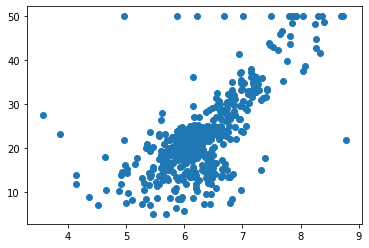

In [9]:
#Graficamos los datos correspondientes
plt.scatter(X_adr, y_adr)
plt.show()

In [10]:
#Separamos los datos en entrenamiento y prueba para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size=0.2)

In [11]:
#Definimos el algoritmo a utilizar
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth = 5)

In [12]:
#Entrenamos el modelo
adr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
#Realizamos una predicción
Y_pred = adr.predict(X_test)
print(Y_pred)

[17.58627451 45.8        18.62727273 17.58627451 12.61818182 20.65070423
 20.65070423 18.62727273 18.62727273 33.94       17.58627451 20.65070423
 18.62727273 17.58627451 17.58627451 20.65070423 20.65070423 18.62727273
 50.         20.65070423 45.8        20.65070423 18.62727273 20.65070423
 18.62727273 24.1475     29.6        15.45       24.1475     18.62727273
 31.1        33.94       20.65070423 41.85       20.65070423 20.65070423
 24.1475     24.1475     17.58627451 29.6        20.65070423 29.025
 24.1475     24.1475     20.65070423 18.62727273 18.62727273 23.9
 20.65070423 45.8        28.2125     12.61818182 17.58627451 12.61818182
 20.65070423 17.58627451 20.65070423 24.1475     24.1475     17.58627451
 24.1475     17.58627451 20.65070423 15.45       33.94       28.2125
 20.65070423 20.65070423 20.65070423 31.1        18.62727273 29.6
 24.1475     18.62727273 33.94       18.62727273 33.94       17.58627451
 20.65070423 33.94       15.45       17.58627451 18.62727273 17.58627451
 

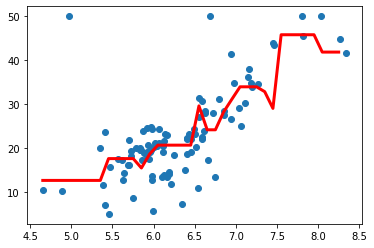

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.698056276074301


In [14]:
#Graficamos los datos de prueba junto con la predicción
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)
plt.show()
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(adr.score(X_train, y_train))